In [ ]:
# # BGR, BGRA, Ahlpha 채널 (rgba.py)

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # 기본 값 옵션
# img = cv2.imread('0.png')   
# # IMREAD_COLOR 옵션                   
# bgr = cv2.imread('0.png', cv2.IMREAD_COLOR)    
# # IMREAD_UNCHANGED 옵션
# bgra = cv2.imread('0.png', cv2.IMREAD_UNCHANGED) 
# # 각 옵션에 따른 이미지 shape
# print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 



# cv2.imshow('bgr', bgr)
# cv2.imshow('bgra', bgra)
# cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# source_image = cv2.imread("6LfDs.png") #Image of cat with text watermark
# text = cv2.imread("gJAAx.png", cv2.IMREAD_UNCHANGED) #Image of text

# correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
# original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

# cv2.imwrite("original_image.png", original_image)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
source_image = cv2.imread("cattext.png") #Image of cat with text watermark
text = cv2.imread("textwatermark.png", cv2.IMREAD_UNCHANGED) #Image of text

correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

cv2.imwrite("0.png", original_image)

True

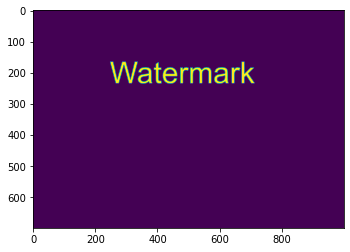

In [ ]:

plt.imshow(test_image)

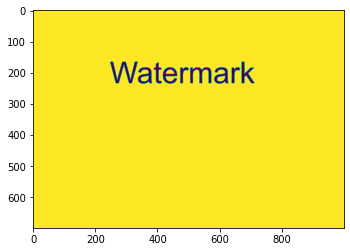

In [ ]:

plt.imshow(correcting_matrix)

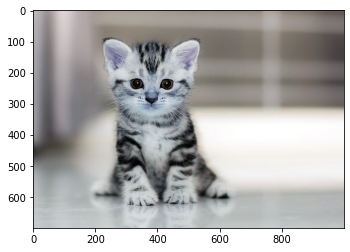

In [ ]:
plt.imshow(original_image)

In [135]:
img = cv2.imread('ultrasound.png')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

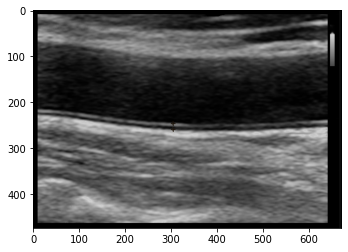

In [139]:
plt.imshow(img)
plt.imshow(mask)
plt.imshow(dst)

In [ ]:
cv2.imwrite("00001.png", dst)

True

In [ ]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

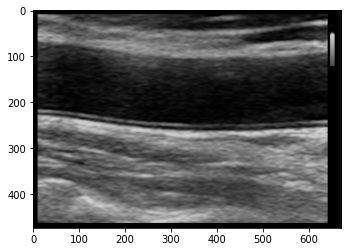

In [ ]:
plt.imshow(dst)

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [95]:
img = cv2.imread('patient.jpg')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

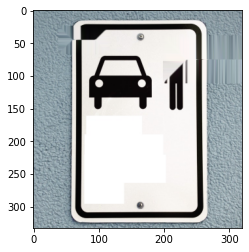

In [152]:
# plt.imshow(img)
# plt.imshow(mask)
plt.imshow(dst)

In [8]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

In [ ]:
plt.imshow(dst)

In [ ]:
############### 시작

In [1]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 42 kB/s 
     |████████████████████████████████| 47.6 MB 54 kB/s 


In [2]:
pip install googletrans

     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 8.7 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=4ba8a45128e5b2283500aaaa28104bc349b86995f47214bf6537e898ca9135c7
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


4.5.4-dev


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


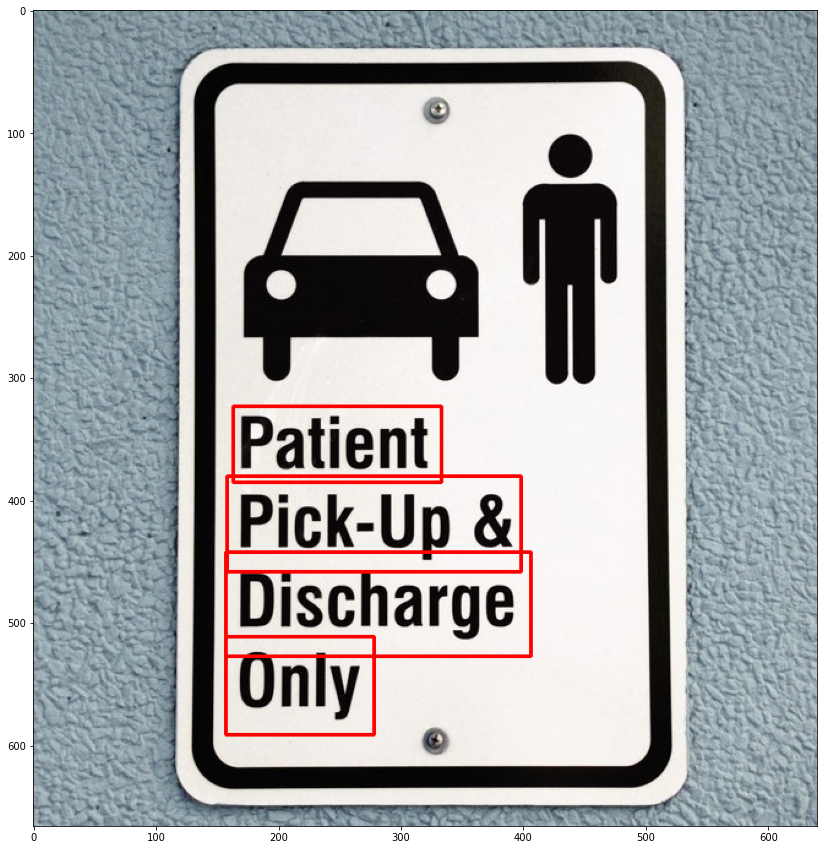

Text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']
Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']


In [3]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)

        # show the output image
        display(img2)

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
    return bbox_list, text_list


def translate_texts(texts: List[str], type='google') -> List[str]:
    global tranlated_texts
    if type == 'google':
        translator = googletrans.Translator()
        tranlated_texts = [
            translator.translate(text=text, src='en', dest='ko').text
            for text in texts
        ]
    elif type == 'naver':
        url = "https://openapi.naver.com/v1/papago/n2mt"
        header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
        tranlated_texts = []
        for text in texts:
            data = {'text': text, 'source': 'en', 'target': 'ko'}
            response = requests.post(url, headers=header, data=data)
            rescode = response.status_code
            if rescode == 200:
                t_data = response.json()
                tranlated_texts.append(t_data['message']['result']['translatedText'])
            else:
                print("Error Code:", rescode)

    return tranlated_texts


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    _, text_list = easy_ocr_result(img)
    print('Text_list :', text_list)
    tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
    print(f'Tranlated_texts : {tranlated_texts}')


4.5.4-dev


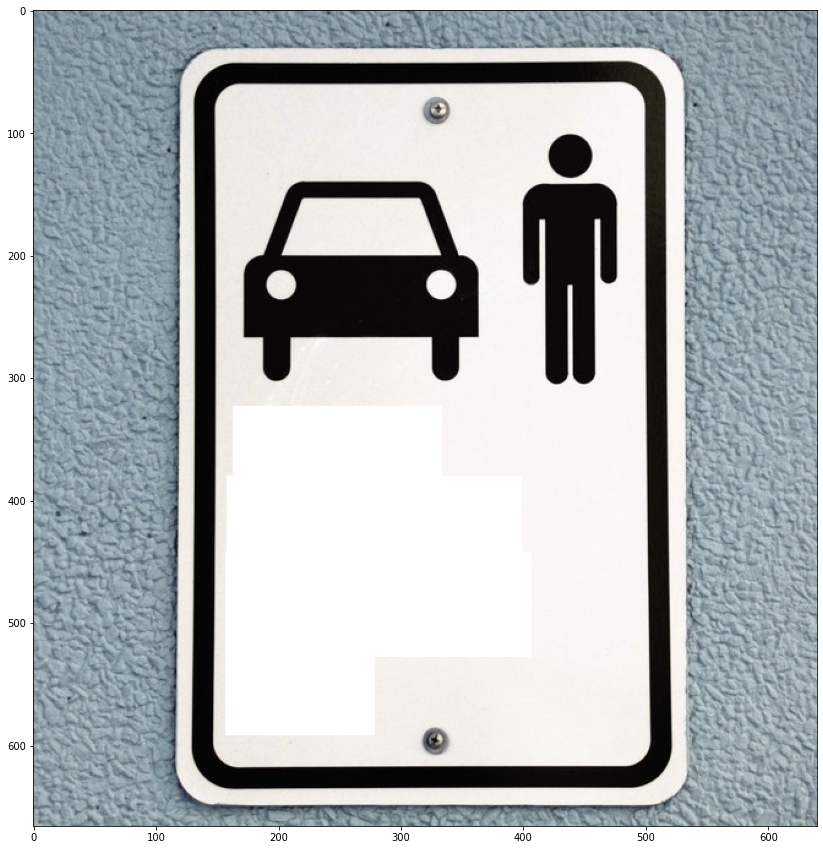

bbox_list : [[[163, 323], [333, 323], [333, 385], [163, 385]], [[158, 380], [398, 380], [398, 458], [158, 458]], [[157, 442], [406, 442], [406, 527], [157, 527]], [[157, 511], [278, 511], [278, 591], [157, 591]]]
text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']


In [4]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 255, 255), -1) # white box

        # show the output image
        display(img2)
        cv2.imwrite("target.jpg", img2) # img2 파일저장 "target.jpg"

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
    return bbox_list, text_list
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    bbox_list, text_list = easy_ocr_result(img)
    print('bbox_list :', bbox_list)
    print('text_list :', text_list)

In [29]:
    bbox_list

[[[163, 323], [333, 323], [333, 385], [163, 385]],
 [[158, 380], [398, 380], [398, 458], [158, 458]],
 [[157, 442], [406, 442], [406, 527], [157, 527]],
 [[157, 511], [278, 511], [278, 591], [157, 591]]]

In [ ]:
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)


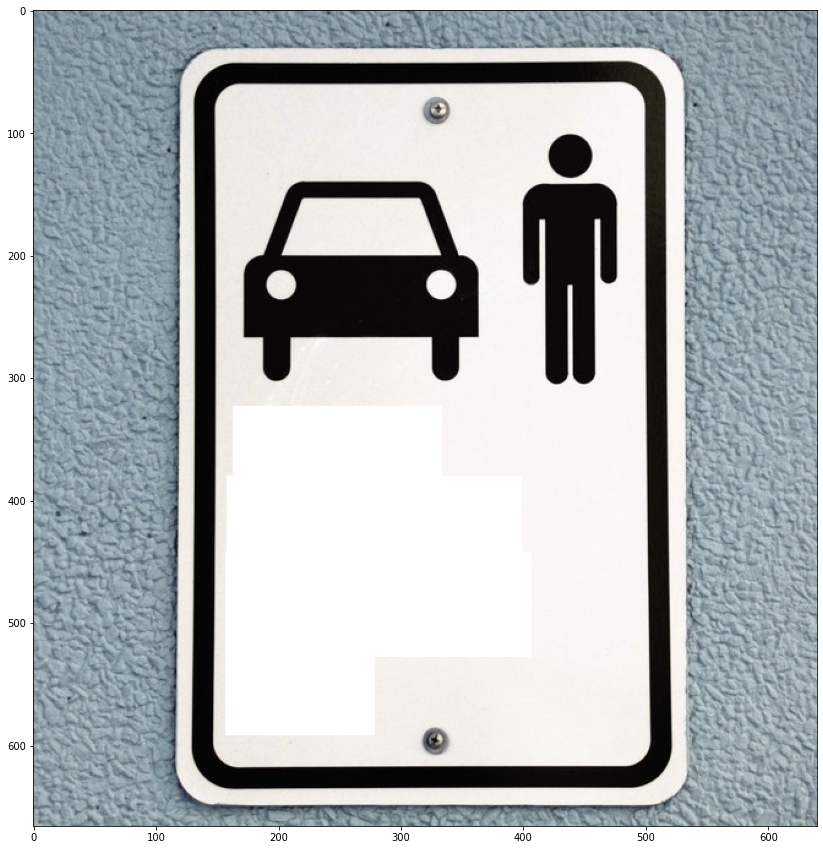

([[[163, 323], [333, 323], [333, 385], [163, 385]],
  [[158, 380], [398, 380], [398, 458], [158, 458]],
  [[157, 442], [406, 442], [406, 527], [157, 527]],
  [[157, 511], [278, 511], [278, 591], [157, 591]]],
 ['Patient', 'Pick-Up &', 'Discharge', 'Only'])

In [27]:
easy_ocr_result(img)

In [ ]:
plt.imshow(easy_ocr_result(img))

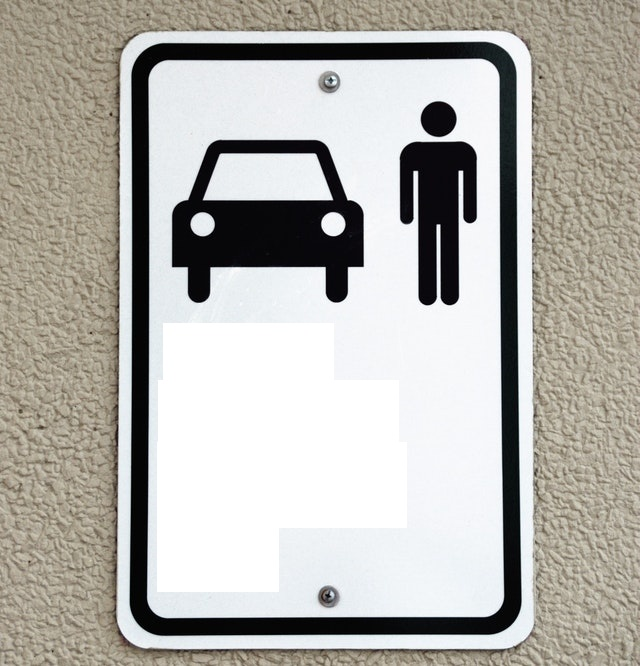

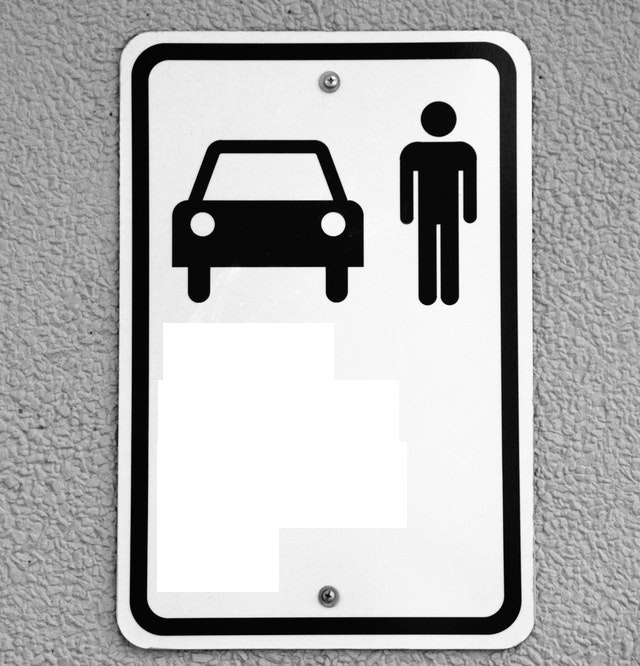

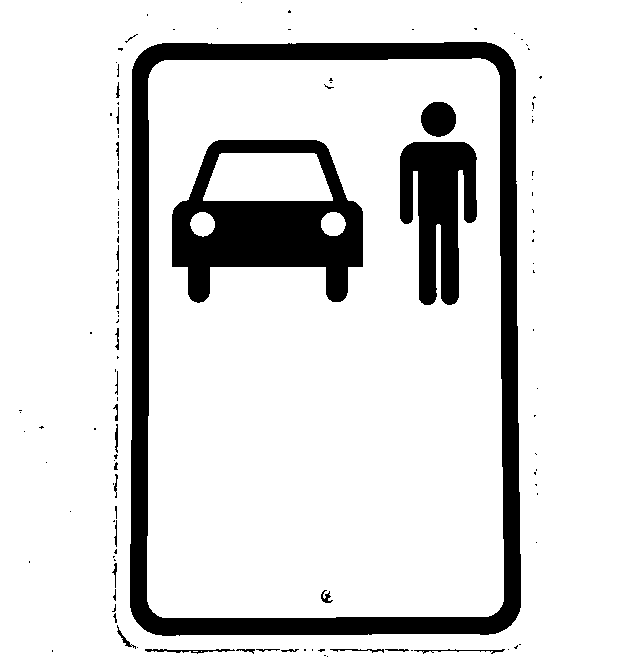

In [120]:
from google.colab.patches import cv2_imshow


src = cv2.imread('target.jpg', cv2.IMREAD_COLOR)


dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(dst, 80, 255, cv2.THRESH_BINARY)
cv2_imshow(src)
cv2_imshow(dst)
cv2_imshow(mask)

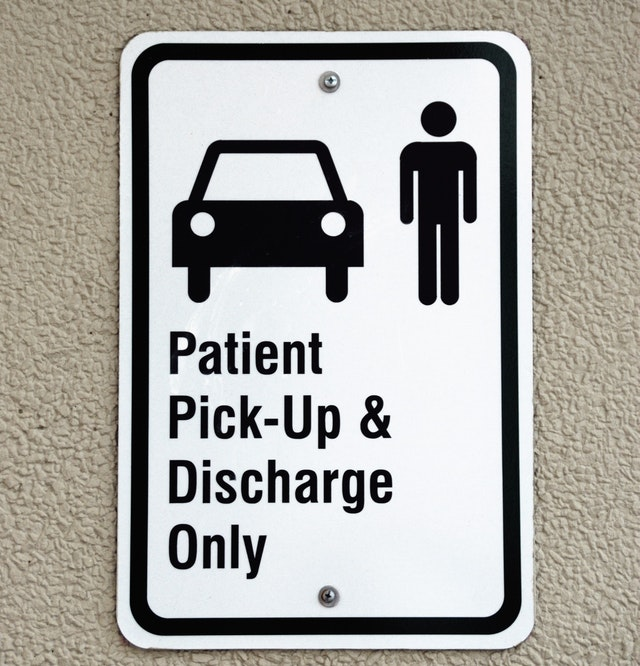

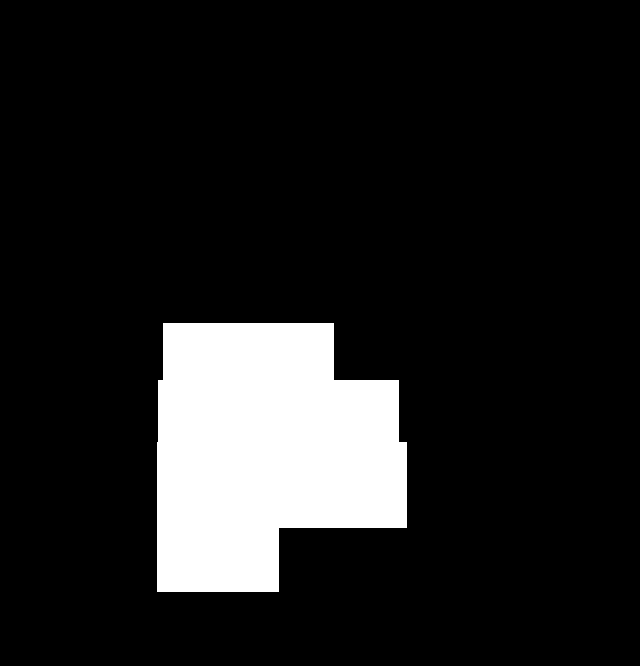

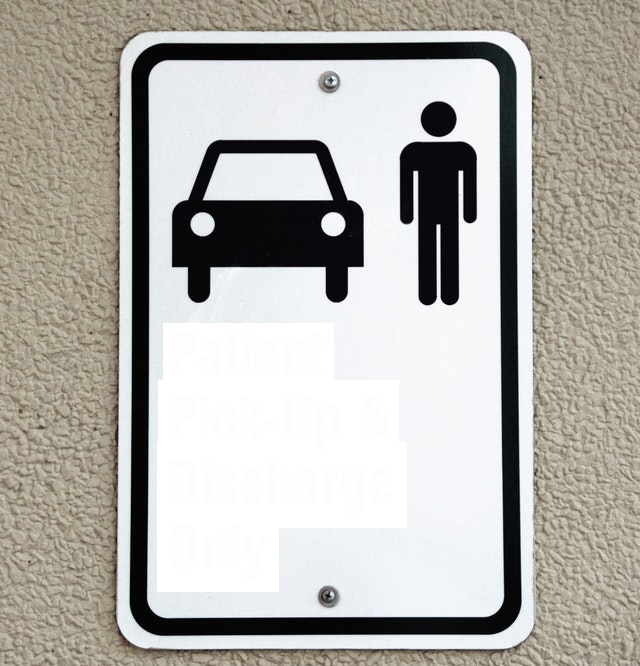

True

In [5]:
# shapes
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load image
img = cv2.imread('patient.jpg')

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)


# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization
cv2_imshow(img)
cv2_imshow(shapes)

cv2_imshow(out)


#
cv2.imwrite("shapes.jpg", shapes)


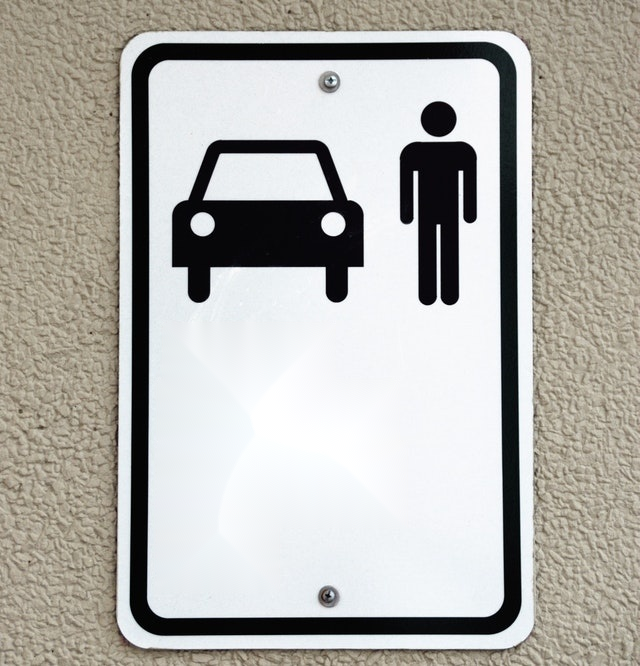

True

In [6]:
# inpaint
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('target.jpg')
mask = cv2.imread('shapes.jpg',0)
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2_imshow(dst)

# 저장
cv2.imwrite("inpaint.jpg", dst)

In [60]:
from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw

# db.set_character_set('utf8')
# dbc.execute('SET NAMES utf8;')
# dbc.execute('SET CHARACTER SET utf8;')
# dbc.execute('SET character_set_connection=utf8;')


# font = ImageFont.load_default()
font = ImageFont.truetype("NotoSansKR-Black.otf", 50)

img = Image.open('inpaint.jpg')

draw = ImageDraw.Draw(img)


# draw.text((163, 323), (333, 385)),"AAAAAAAAAAA!",(0,0,0),font=font)
# draw.text((158, 380), (398, 458)),"BBBBBBB & !",(0,0,0),font=font)
# draw.text((157, 442), (406, 527)),"CCCCCC !",(0,0,0),font=font)
# draw.text((157, 511), (278, 591)),"DDDDD !",(0,0,0),font=font)

# text = "안녕"
# draw.text((0, 150), text, (0, 0, 0), font=font)

draw.text((163, 323),"환자!",(0,0,0),font=font)
draw.text((158, 380),"픽업 & !",(0,0,0),font=font)
draw.text((157, 442),"퇴원 !",(0,0,0),font=font)
draw.text((157, 511),"오직 !",(0,0,0),font=font)
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)
# Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']

# draw=ImageDraw.Draw(im)
# draw.text((13,75),"르브론 제임스 \nLA레이커스",font=ImageFont.truetype("SCDream7.otf", 16), fill=(255,255,255)) 
# im.save("title.png")

img.show("imgtext.jpg")
img.save("imgtext.jpg")



In [54]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import os

target_image = Image.open('inpaint.jpg')  #일단 기본배경폼 이미지를 open 합니다.
fontsFolder = 'NanumGothic.ttf'    



selectedFont = ImageFont.truetype(os.path.join(fontsFolder, 'NanumGothic.ttf'), 24) #폰트경로과 사이즈를 설정해줍니다.
draw =ImageDraw.Draw(target_image)
draw.text( ((163, 323), (333, 385)), keyword,fill=(0, 0, 0), font=selectedFont)
# fill= 속성은 무슨 색으로 채울지 설정,font=는 자신이 설정한 폰트 설정
target_image.save('imgtext2.jpg') #편집된 이미지를 저장합니다.

TypeError: ignored

In [ ]:
# from PIL import Image, ImageDraw, ImageFont

# img = Image.open('inpaint.jpg')
# d1 = ImageDraw.Draw(img)
# myFont = ImageFont.truetype('E:/PythonPillow/Fonts/FreeMono.ttf', 40)
# d1.text((0, 0), "Sample text", font=myFont, fill =(255, 0, 0))
# img.show()
# img.save("imgtext.jpg")

In [ ]:
# from PIL import Image, ImageDraw, ImageFont

# unicode_text = u"Hello World!"
# font = ImageFont.truetype("arial.ttf", 28, encoding="unic")
# text_width, text_height = font.getsize(unicode_text)
# canvas = Image.new('RGB', (text_width + 10, text_height + 10), "orange")
# draw = ImageDraw.Draw(canvas)
# draw.text((5, 5), u'Hello World!', 'blue', font)
# canvas.save("unicode-text.png", "PNG")
# canvas.show()

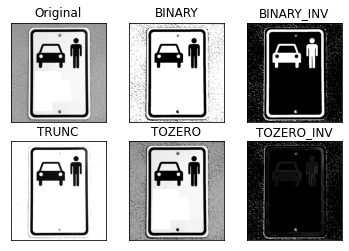

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()

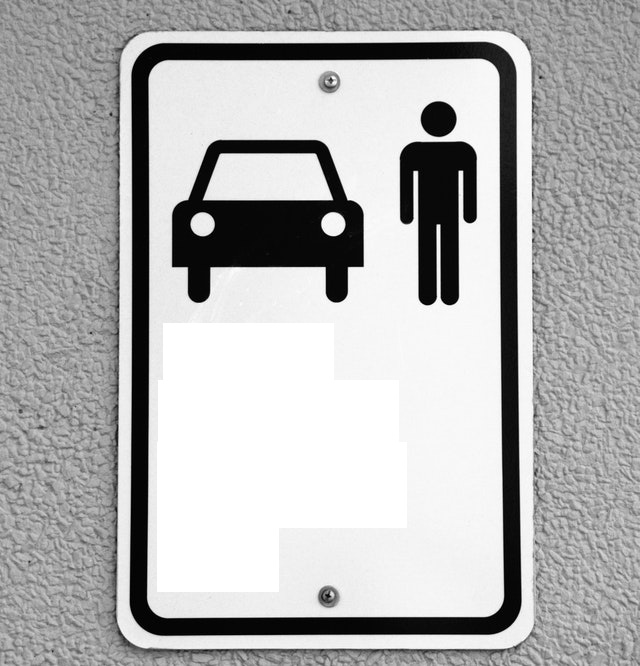

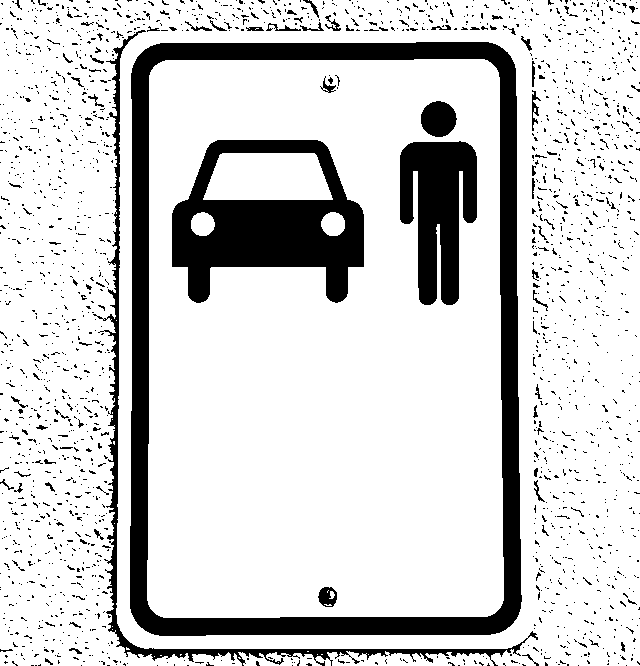

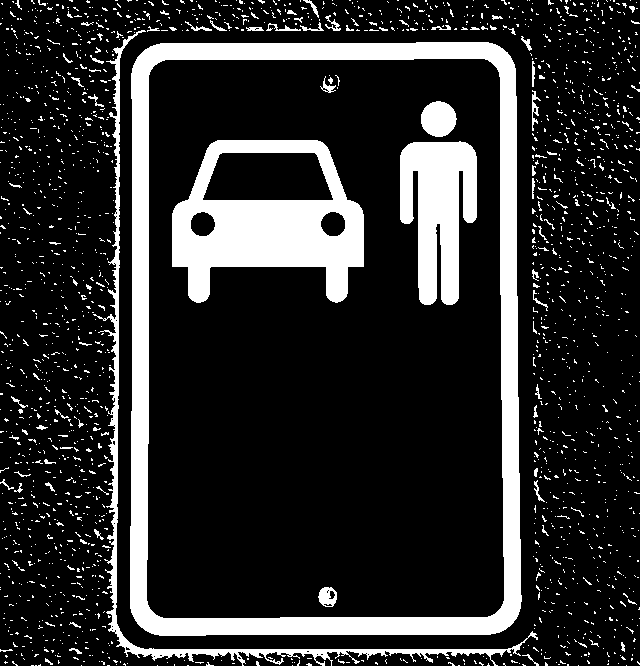

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img_source = cv2.imread('target.jpg',0)

ret,img_result1 = cv2.threshold(img_source, 127, 255, cv2.THRESH_BINARY)
ret,img_result2 = cv2.threshold(img_source, 127, 255, cv2.THRESH_BINARY_INV)


cv2_imshow(img_source)
cv2_imshow(img_result1)
cv2_imshow(img_result2)



# 새 섹션

In [ ]:
#  mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)  # Mask of original image
#  #some process to draw these rectangles merged...
#  _, bw = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
#  img, contours, hierarchy = cv2.findContours(bw.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#  for j in range(len(contours)):
#         outputBoxes.append(cv2.boundingRect(contours[j]))

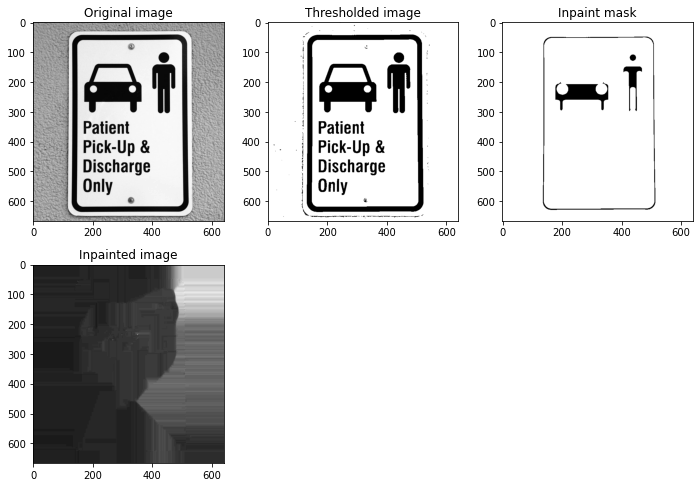

In [34]:
import cv2
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('patient.jpg', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.threshold(img, 82, 255, cv2.THRESH_BINARY)[1]

# Remove small noise
inp_mask = cv2.morphologyEx(mask,
                            cv2.MORPH_OPEN,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

# Dilate mask
inp_mask = cv2.dilate(inp_mask,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))

# Inpaint
dst = cv2.inpaint(img, inp_mask, 15, cv2.INPAINT_NS)

# Show results
plt.figure(1, figsize=(10, 10))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(3, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Thresholded image')
plt.subplot(3, 3, 3), plt.imshow(inp_mask, cmap='gray'), plt.title('Inpaint mask')
plt.subplot(3, 3, 4), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image')

plt.tight_layout()
plt.show()



In [ ]:
# Mat image_ch1 = imread("patient.jpg", IMREAD_GRAYSCALE)
# CV_Assert(image_ch1.data)
# imshow(image_ch1)



In [ ]:
# Mat image_mask_black_bg_ch1
# threshold(image_ch1, image_mask_black_bg_ch1, 0, 255, THRESH_BINARY)
# imshow(image_mask_black_bg_ch1)

In [ ]:
# Mat image_mask_white_bg_ch1

#     threshold(image_ch1, image_mask_white_bg_ch1, 0, 255, THRESH_BINARY_INV)
#     bitwise_not(image_mask_black_bg_ch1, image_mask_white_bg_ch1)

# imshow(image_mask_white_bg_ch1)

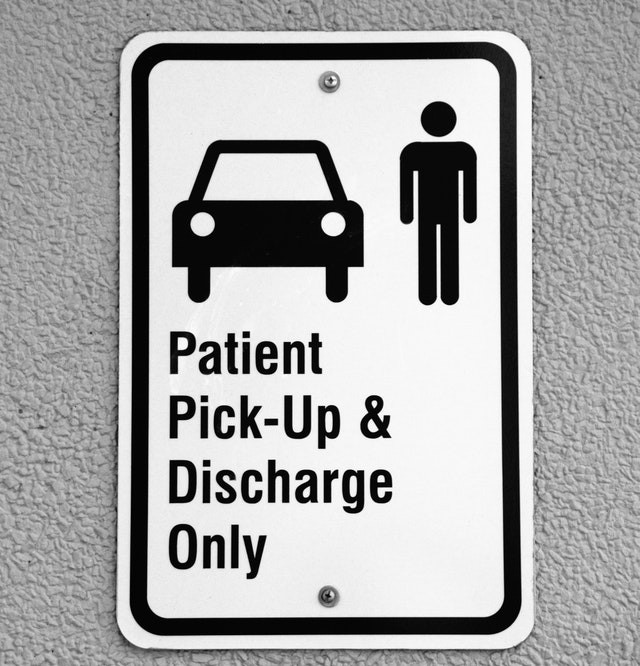

In [ ]:
src = cv2.imread('patient.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit

# 트랙바 함수 정의
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)
    
cv2_imshow(src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold) # 임계값 범위 0~255
cv2.setTrackbarpos('Threshold', 'dst', 128) # 임계값 초기값 128

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# dst = cv.inpaint(src, inpaintMask, inpaintRadius, flags[, dst])

# inpaintMask 는 8비트 1채널 이미지(흑백이미지)를 사용해야한다. 
# inpaintRadius 는 알고리즘에 의해 각 포인트의 circular neighborhood 의 Radius 를 뜻한다. 

# inpaint(inpainted, mask, dst, 3, INPAINT_NS); namedWindow("inpaint"); imshow("inpaint", dst);


In [ ]:
# # Draw rectangle    p1(x,y)    p2(x,y)    Student name box
# cv2.rectangle(frame, (500, 650), (800, 700), (42, 219, 151), cv2.FILLED )
# font = cv2.FONT_HERSHEY_DUPLEX
# cv2.putText(frame, name, (510, 685), font, 1.0, (255, 255, 255), 1


In [ ]:
# import cv2
# import numpy as np

# img = cv2.imread("lena.png")

# # First we crop the sub-rect from the image
# x, y, w, h = 100, 100, 200, 100
# sub_img = img[y:y+h, x:x+w]
# white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255

# res = cv2.addWeighted(sub_img, 0.5, white_rect, 0.5, 1.0)

# # Putting the image back to its position
# img[y:y+h, x:x+w] = res

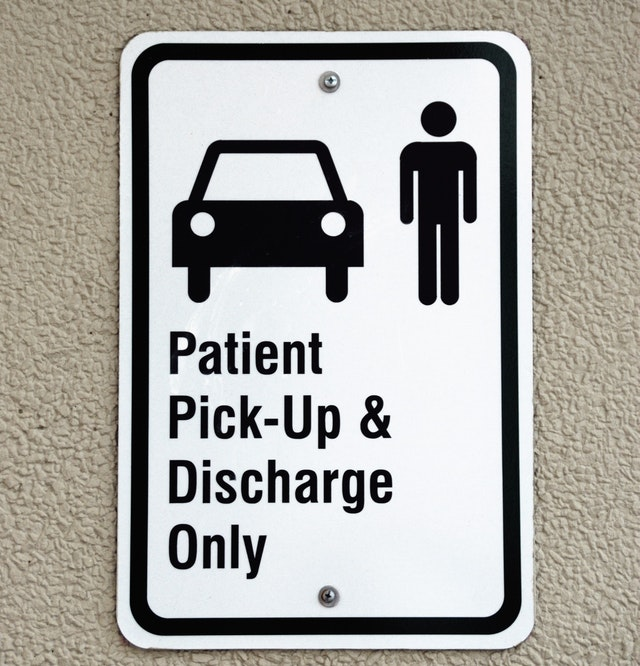

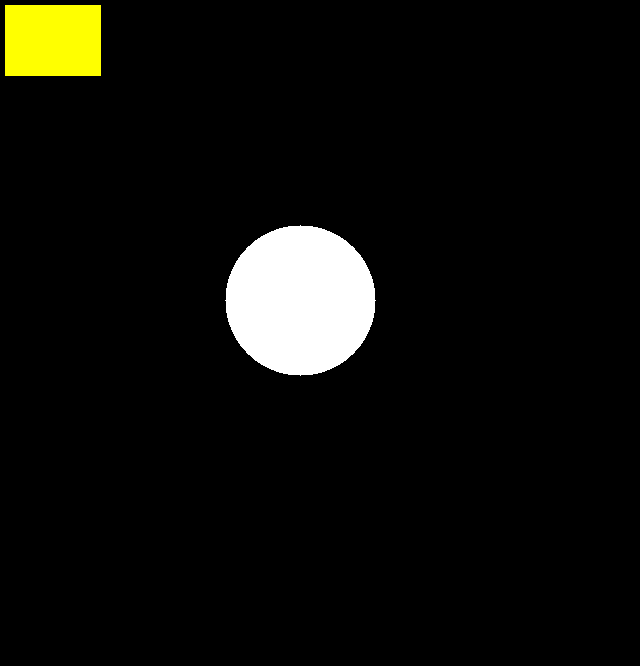

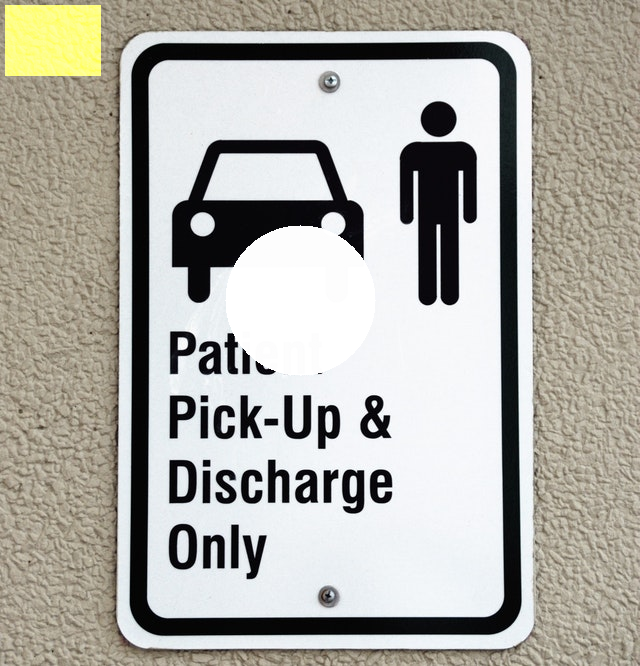

In [108]:
import cv2
import numpy as np

# Load image
img = cv2.imread('patient.jpg')

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, (5, 5), (100, 75), (255, 255, 255), cv2.FILLED)


# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization
cv2_imshow(img)
cv2_imshow(shapes)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2 #cv2 임포트



def im_trim (img): #함수로 만든다
    x = 845; y = 325; #자르고 싶은 지점의 x좌표와 y좌표 지정
    w = 180; h = 235; #x로부터 width, y로부터 height를 지정
    img_trim = img[y:y+h, x:x+w] #trim한 결과를 img_trim에 담는다
    cv2.imwrite('org_trim.jpg',img_trim) #org_trim.jpg 라는 이름으로 저장
    return img_trim #필요에 따라 결과물을 리턴

org_image = cv2.imread('test.jpg') #test.jpg 라는 파일을 읽어온다
trim_image = im_trim(org_image) #trim_image 변수에 결과물을 넣는다

In [ ]:
# import cv2
# #distorted_img: The image on which inpainting has to be done.
# #mask: Black mask with white pixels to be inpainted
# res_NS = cv2.inpaint(distort_img, mask, 3, cv2.INPAINT_NS)
# res_TELEA = cv2.inpaint(distort_img, mask, 3, cv2.INPAINT_TELEA)
# res_FSRFAST = distorted_img.copy()
# res_FSRBEST = distorted_img.copy()
# mask1 = cv2.bitwise_not(mask)
# cv2.xphoto.inpaint(distort, mask1, res_FSRFAST,        cv2.xphoto.INPAINT_FSR_FAST)
# cv2.xphoto.inpaint(distort, mask1, res_FSTBEST, cv2.xphoto.INPAINT_FSR_BEST)

In [54]:
import numpy as np

for field in image: 
    verticies = field.get('boundingPoly').get('vertices') 
    # bounding box의 좌표값 np.array 객체로 재구성하기 
    box = np.array([tuple(v.values()) for v in verticies], np.int32) 
    # bounding box 영역 이미지에 출력하기 
    img = cv2.polylines(img, [box], True, (0,255,0), 2) 
    # ocr결과 텍스트 bounding box 상단에 출력하기 
    img = cv2.putText(img, field.get('inferText'), tuple(box[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 1) 
    
# 이미지 출력하기 
plt.imshow(img) 
plt.show()

AttributeError: ignored

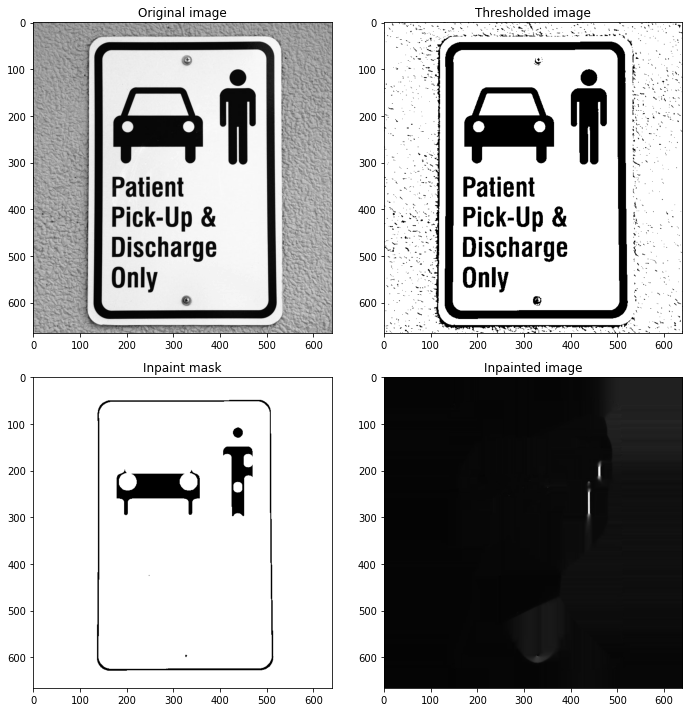

In [19]:
import cv2
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('patient.jpg', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]

# Remove small noise
inp_mask = cv2.morphologyEx(mask,
                            cv2.MORPH_OPEN,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

# Dilate mask
inp_mask = cv2.dilate(inp_mask,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))

# Inpaint
dst = cv2.inpaint(img, inp_mask, 15, cv2.INPAINT_NS)

# Show results
plt.figure(1, figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(2, 2, 2), plt.imshow(mask, cmap='gray'), plt.title('Thresholded image')
plt.subplot(2, 2, 3), plt.imshow(inp_mask, cmap='gray'), plt.title('Inpaint mask')
plt.subplot(2, 2, 4), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image')
plt.tight_layout()
plt.show()

In [ ]:
# import cv2
# import numpy as np

# # read input
# img = cv2.imread('patient.jpg')

# # convert to hsv and extract saturation
# hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# sat = hsv[:,:,1]

# # threshold and invert
# thresh = cv2.threshold(sat, 10, 255, cv2.THRESH_BINARY)[1]
# thresh = 255 - thresh

# # apply morphology dilate
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

# # do inpainting
# result1 = cv2.inpaint(img,thresh,11,cv2.INPAINT_TELEA)
# result2 = cv2.inpaint(img,thresh,11,cv2.INPAINT_NS)

# # save results
# cv2.imwrite('patient_threshold.jpg', thresh)
# cv2.imwrite('patient_inpainted1.jpg', result1)
# cv2.imwrite('patient_inpainted2.jpg', result1)

# # show results
# cv2.imshow('thresh',thresh)
# cv2.imshow('result1',result1)
# cv2.imshow('result2',result2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

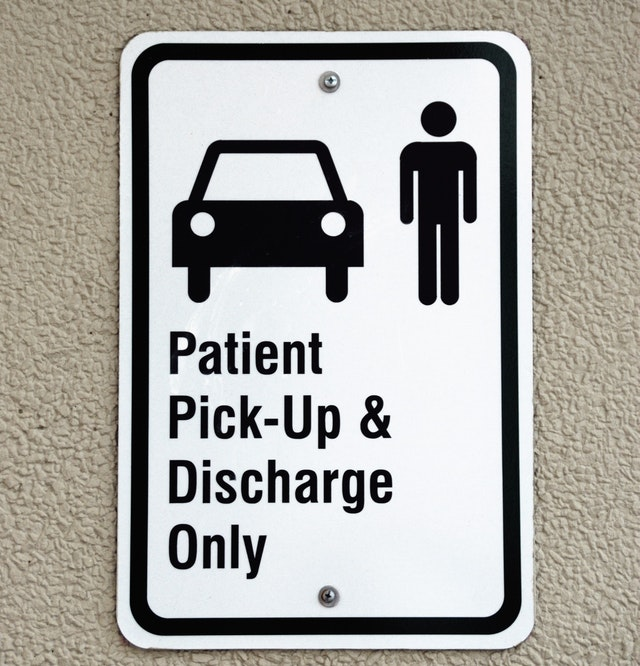

-1

In [31]:
# import cv2
# from google.colab.patches import cv2_imshow
# image = cv2.imread('patient.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,3))
# close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)

# dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
# dilate = cv2.dilate(close, dilate_kernel, iterations=1)

# cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     area = cv2.contourArea(c)
#     if area > 800 and area < 15000:
#         x,y,w,h = cv2.boundingRect(c)
#         cv2.rectangle(image, (x, y), (x + w, y + h), (222,228,251), -1)

# cv2_imshow( image)
# cv2.waitKey()

In [45]:
import requests 
import time 
import json 

API_URL = 'URL' 

headers = { 
    'X-OCR-SECRET': 'secret key', 
    'Content-Type': 'multipart/form-data' 
} 

files = [ 
    ('file', open('patient.jpg','rb')) 
] 
data = { 
    'message': { 
        "images":[{"format":"jpg","name":"demo"}], 
        "requestId":"guide-demo", 
        "version":"V2", 
        "timestamp":time.time()
     } 
} 

response = requests.post(API_URL, headers=headers, data=data, files = files) 

# response에서 OCR 결과물만 선별 
fields = response['images'].values[0].get('fields')

MissingSchema: ignored

In [46]:
# 필요 라이브러리 불러오기 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# 이미지 불러오기 
args_image = "patient(.jpg / .png)" 
img = cv2.imread(args_image) 

for field in fields: 
    verticies = field.get('boundingPoly').get('vertices') 
    # bounding box의 좌표값 np.array 객체로 재구성하기 
    box = np.array([tuple(v.values()) for v in verticies], np.int32) 
    # bounding box 영역 이미지에 출력하기 
    img = cv2.polylines(img, [box], True, (0,255,0), 2) 
    # ocr결과 텍스트 bounding box 상단에 출력하기 
    img = cv2.putText(img, field.get('inferText'), tuple(box[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 1) 
    
# 이미지 출력하기 
plt.imshow(img) 
plt.show()

NameError: ignored

In [47]:
# 라이브러리 불러오기 
from PIL import ImageFont, ImageDraw, Image 

# 이미지 불러오기 
args_image2 = "Original image file(.jpg / .png)" 
img2 = cv2.imread(args_image2) 
img_pil = Image.fromarray(img2) 

# 폰트 불러오기 
fontpath = "fonts/gulim.ttc" 
font = ImageFont.truetype(fontpath, 15) 

# ImageDraw 객체 생성 
draw = ImageDraw.Draw(img_pil) 

for field in fields: 
    verticies = field.get('boundingPoly').get('vertices') 
    box = [tuple(v.values()) for v in verticies] 
    # bounding box 영역 마스킹하기 
    draw.polygon(box, outline=(0,255,0), fill=(255,255,255)) 
    # ocr결과 텍스트(한글) bounding box 영역에 출력하기 
    draw.text(box[0], field.get('inferText'), font=font, fill=(0,0,0)) 
    
# 이미지 출력하기 
plt.imshow(img_pil) 
plt.show()



AttributeError: ignored

In [1]:
# import cv2

# clickflag = 0 # 클릭상태 확인 전역변수 초기값 0

# def draw_circle(event, x, y, flags, param): 
#     if event == cv2.EVENT_LBUTTONDOWN : # 마우스 왼쪽버튼을 누르면 
#         cv2.circle(img, (x, y), 10, (255,0,0), -1) # (x,y)마우스좌표 중심점으로 반지름 10, (B,G,R)색상, -1은 내부 모두 채움

# def draw_rec(event, x,y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         cv2.rectangle(img, (x,y), (x+100,y+100), (0,255,0), 3) # (x,y)마우스좌표 중신점으로 100x100 사각형을 만듦

# def free_drawing(event, x,y, flags, param): # 자유롭게 그리기
#     global clickflag # 클릭상태를 확인 (전역 변수를 불러옴)

#     if event == cv2.EVENT_LBUTTONDOWN: # 왼쪽버튼을 누르면 플레그를 1로
#         clickflag = 1

#     if event == cv2.EVENT_LBUTTONUP: # 버튼은 때면 0으로
#         clickflag = 0

#     if clickflag == 1:
#         event = cv2.EVENT_MOUSEMOVE # 플레그가 1일때, 마우스가 움직여도 그림이 그려짐
#         cv2.circle(img, (x, y), 10, (255, 0, 0), -1)
# img = cv2.imread('patient.jpg', cv2.IMREAD_COLOR) # img에 이미지를 불러옴. 
# img = cv2.line(img,(0, 100), (1025, 100), (155,55,55),(30)) # 위쪽에 가로 줄을 그음. 
# font = cv2.FONT_HERSHEY_DUPLEX # 텍스트의 폰트를 지정.

# cv2.putText(img, "WARNNING!! This is DDOS Virus", (20, 90), font, 2,(0,0,155), 2, cv2.LINE_AA) # 텍스트를 입력, 글자, 위치, 폰트, 크기 등

# cv2.namedWindow('image') 
# cv2.setMouseCallback('image', free_drawing) # free_drawing함수 호출 (이곳에서 윈도우에서 실행결정)


# while(1): 
#     cv2.imshow('image', img) 
#     if cv2.waitKey(20) & 0xFF == 0x1B: # 무한 반복중, 키보드 ESC 아스키코드가 들어오면 빠져나감. 
#         break 
# cv2.destroyAllWindows() # 창을 종료



In [ ]:
# convert watermark.png -alpha extract -threshold 0 mask.png

In [ ]:
# #!/opt/local/bin/python3.6

# import numpy as np
# import skimage.io
# import skimage.restoration
# import skimage.exposure

# img = skimage.io.imread('/Users/fred/desktop/kitty.png')
# msk = skimage.io.imread('/Users/fred/desktop/mask.png')
# msk = skimage.exposure.rescale_intensity(msk, in_range='image', out_range=(0,1))
# newimg = skimage.restoration.inpaint_biharmonic(img, msk, multichannel=True)
# skimage.io.imsave('/Users/fred/desktop/kitty_inpaint_biharmonic.png', newimg)

In [ ]:


import numpy as np
import skimage.io
import skimage.restoration
import skimage.exposure

img = skimage.io.imread('/content/cattext.png')
msk = skimage.io.imread('/content/textwatermark.png')
msk = skimage.exposure.rescale_intensity(msk, in_range='image', out_range=(0,1))
newimg = skimage.restoration.inpaint_biharmonic(img, msk, multichannel=True)
skimage.io.imsave('/content/01.png', newimg)

In [ ]:
# convert kitty.png \
# \( watermark.png -alpha extract -threshold 0 -negate \) \
# -alpha off -compose copy_opacity -composite \
# -crop 490x102+235+150 +repage tmp1.png

In [ ]:
convert cattext.png \
\( textwatermark.png -alpha extract -threshold 0 -negate \) \
-alpha off -compose copy_opacity -composite \
-crop 490x102+235+150 +repage tmp1.png

In [ ]:
# convert tmp1.png \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# -layers RemoveDups \
# -filter Gaussian -resize 490x102! \
# -background None \
# -compose DstOver -layers merge \
# -alpha opaque \
# tmp2.png

In [ ]:
# convert kitty.png tmp2.png -geometry +235+150 -compose over -composite kitty2.png

In [ ]:
# Line1 - read the kitty image
# Line2 - copy it and make it all white rgb(255,255,255), save it into memory and delete the copy image from the image sequence
# Line3 - read the watermark image and extract the alpha channel. Then subtract it from white
# Line4 - divide the result of line 3 by the white image
# Line5 - divide the kitty image by the result of line 4
# Line6 - save the result to disk

# convert kitty.png \
# \( -clone 0 -fill white -colorize 100 -write mpr:white +delete \) \
# \( watermark.png -alpha extract mpr:white -compose minus -composite \
# mpr:white +swap -compose divide -composite \) \
# +swap -compose divide -composite \
# kitty_restored.png